<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/AirfoilS809_komegaSST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install google-auth
from google.colab import auth
from google.colab import drive

drive.mount('/content/drive')
# !ls /content/drive/MyDrive/

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=5, h1 = 61, h2 = 60, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    # self.dropout1 = nn.Dropout(0.05)
    self.fc2 = nn.Linear(h1,h2)
    # self.dropout2 = nn.Dropout(0.05)
    # self.fc3 = nn.Linear(h2,h3)
    # self.dropout3 = nn.Dropout(0.25)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    # x = self.dropout1(x)
    x = F.sigmoid(self.fc2(x))
    # x = self.dropout2(x)
    # x = F.sigmoid(self.fc3(x))
    # x = self.dropout3(x)
    x = self.out(x)

    return x

torch.manual_seed(42)

model = Model()

In [5]:
# Read the data set -  Airfoil S809
df1 = pd.read_csv("/content/drive/MyDrive/komegaSST_data/data_set1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/komegaSST_data/data_set2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/komegaSST_data/data_set3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/komegaSST_data/data_set4.csv")

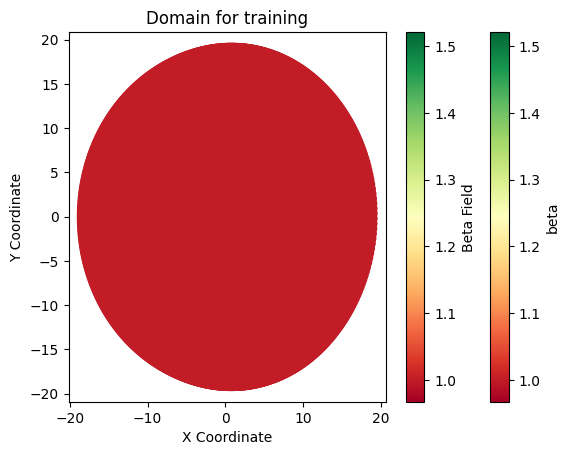

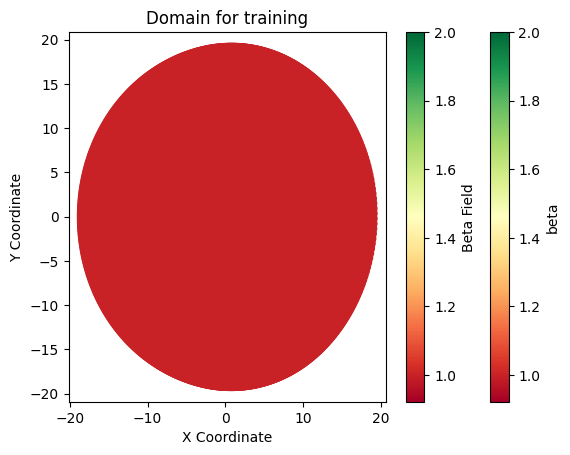

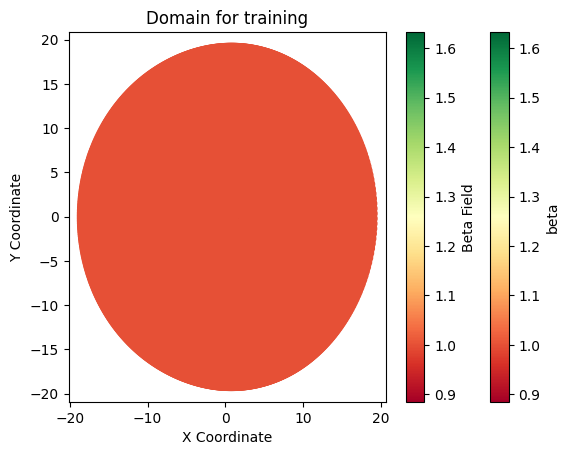

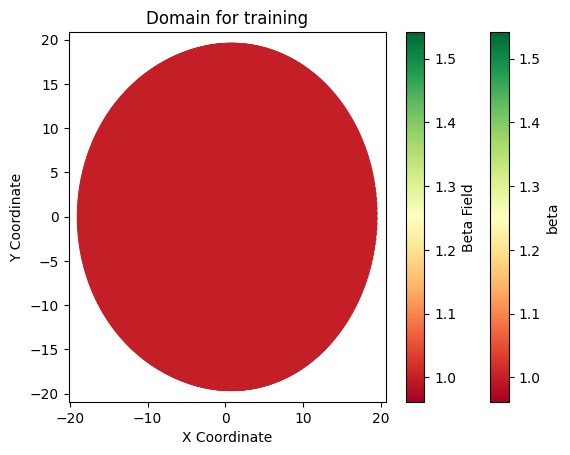

In [8]:
# Combine data
frames = [df1, df2, df3, df4]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])


  # # Normalize x and y coordinates
  # min_range = -5.0
  # max_range = 5.0
  # xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  # yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))



  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=-0.2 and xc[i]<=1.0:
      if yc[i]>=-0.15 and yc[i]<=0.20:
        x1.append(xc[i])
        y1.append(yc[i])
        b1.append(b[i])
        f1.append(ff1[i])
        f2.append(ff2[i])
        f3.append(ff3[i])
        f4.append(ff4[i])
        f5.append(ff5[i])



  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  'feature4': np.array(f4),
  'feature5': np.array(f5),
  }




  cf = pd.DataFrame(modified_data)
  # Data for beta>1.005 or beta<0.995
  s1 = cf[(cf['beta'] < 0.995) | (cf['beta'] > 1.005)]
  s2 = cf[(cf['beta'] >= 0.995) & (cf['beta'] <= 1.005)]


  s3 = s2.sample(frac=0.20, random_state=1)
  df_filtered = pd.concat([s1, s3], ignore_index=True)

  # df_filtered.shape[0], s1.shape[0], s2.shape[0], s3.shape[0]

  ax = df_filtered.plot.scatter(x='x',
                      y='y',
                      c='beta',
                      colormap='RdYlGn')

  ff.append(df_filtered)

  # #####################################################################
  # Plotting cleaned data
  ################################
  nx = []
  ny = []
  nb = []


  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.9 and xc[i]<=5.3:
      if yc[i]>=4.925 and yc[i]<=5.075:
        nx.append(xc[i])
        ny.append(yc[i])
        nb.append(b[i])

  # Create a scatter plot
  plt.scatter(x1, y1, c=b1,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  plt.colorbar(label='Beta Field')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Domain for training')
  plt.show()
###############################################################################

df = pd.concat(ff)


# # Data for beta>1.02 or beta<0.98
# df_filtered = df[(df['beta'] < 0.995) | (df['beta'] > 1.005)]

# df_filtered = df[df['beta'] != 1.0]

# df_filtered = df